In [452]:
import pandas as pd
from scipy.stats import norm
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [455]:
data_xls = pd.read_excel('khatnaa2.xls', 'Sheet1', index_col=None)

In [456]:
data_xls.to_csv('khatnaa2.csv', encoding='utf-8', index=False)

In [457]:
df1 = pd.read_csv('khatnaa1.csv')
df2 = pd.read_csv('khatnaa2.csv')
data = df1.append(df2,ignore_index = True)

In [458]:
data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Хэвлэсэн огноо: 2019/12/01,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Депозит дансны хуулга - Иргэн,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Харилцагч: ХАТАНБОЛД БАТЗОРИГ (90458024954),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2900,Нийт:,NaN,NaN,NaN,NaN,NaN,NaN,8946224.35,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [459]:
data_dropped = data.drop(['Unnamed: 1', 'Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 8','Unnamed: 9','Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 18','Unnamed: 20','Unnamed: 21','Unnamed: 22'],axis=1)

In [460]:
data = data_dropped.rename(columns={'Unnamed: 0': "date", 'Unnamed: 7': "income",'Unnamed: 10': 'spend','Unnamed: 16':'number_from','Unnamed: 17':'desc','Unnamed: 19': 'final','Unnamed: 23':'from'})

In [461]:
data.head()

,date,income,spend,number_from,desc,final,from
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [462]:
data1 = data

In [463]:
date = data['date'].values
for i in range(len(date)):
    if(str(date[i]) == "nan"):
        data1 = data1.drop(i)

In [471]:
dd = data1.reset_index(drop=True)

In [465]:
dd.head()

,date,income,spend,number_from,desc,final,from
0,2018-05-09 10:33:46,5000.0,0,NaN,NaN,5000,КАРТ ЗАХИАЛГЫН ҮНЭ/ ХАТАНБОЛД-С
1,2018-05-09 10:37:15,0.0,5000,704580002215,NaN,0,КАРТ ШИНЭЭР ЗАХИАЛАХ ҮНЭ/DOMESTIC CLASSIC
2,2018-05-09 14:57:11,134000.0,0,457054690,АМГАЛАН ГАНБАТ,134000,EB -4 sar tsalin
3,2018-05-09 14:57:48,0.0,50,NaN,NaN,133950,ОРЛОГЫН СМС МЭДЭГДЛИЙН ШИМТГЭЛ; Шимтгэлийн дуг...
4,2018-05-11 11:00:49,0.0,20000,NaN,NaN,113950,ХАТАНБОЛД УП99123139


In [472]:
dd.shape

(1445, 7)

In [473]:
net = dd[dd['date'] == 'Нийт:']

In [474]:
net

,date,income,spend,number_from,desc,final,from
278,Нийт:,2797100.00,2787336.35,NaN,NaN,NaN,NaN
1444,Нийт:,8946224.35,8432773.5,NaN,NaN,NaN,NaN


In [475]:
# dd =dd[:-1]
dd = dd.drop([278,1444])
dd.tail()

,date,income,spend,number_from,desc,final,from
1439,2019-11-30 12:27:28,0.0,1500,490017324,624366XXXXXX6258,559564.5,91111520:POS Normal Purchase
1440,2019-11-30 16:08:55,0.0,5100,NaN,624366XXXXXX6258,554464.5,70015400:POS Normal Purchase
1441,2019-11-30 19:53:58,0.0,17750,NaN,624366XXXXXX6258,536714.5,13139604:POS Normal Purchase
1442,2019-11-30 19:57:25,0.0,4500,NaN,624366XXXXXX6258,532214.5,13144256:POS Normal Purchase
1443,2019-12-01 09:51:43,0.0,9000,490017324,624366XXXXXX6258,523214.5,91111520:POS Normal Purchase


In [477]:
dd.to_csv('cleaned_final.csv',index=None)

In [481]:
pdd = pd.read_csv('cleaned_final_all.csv')

In [482]:
def income_time(df):
    months = [x for x in range(1,13)]
    final_income = []
    for month in months:
        df_month = pd.DataFrame()
        inm = 0
        for date in df['date'].values:
            try:
                if(int(date.split('-')[1]) ==int(month)):
                    p = df.loc[df['date'] == date]
                    df_month = df_month.append(p,ignore_index=True)
                    inm = sum(df_month['income'].values)
            except:
                continue
        final_income.append(inm)
    return final_income

In [483]:
def spend_time(df):
    df['spend'] = pd.to_numeric(df['spend'])
    months = [x for x in range(1,13)]
    final_income = []
    for month in months:
        df_month = pd.DataFrame()
        inm = 0
        for date in df['date'].values:
#             try:
            if(int(date.split('-')[1]) ==int(month)):
                p = df.loc[df['date'] == date]
                df_month = df_month.append(p,ignore_index=True)
                inm = sum(df_month['spend'].values)
#             except:
#                 continue
        final_income.append(inm)
    return final_income

In [484]:
spend_m = spend_time(pdd)
pp_spend = pd.DataFrame()
pp_spend['date'] = time
pp_spend['spend'] = spend_m

In [489]:
income_m = income_time(pdd)
time = np.arange(1, 13, 1)
pp_income = pd.DataFrame()
pp_income['date'] = time
pp_income['income'] = income_m
spend_m = spend_time(pdd)
pp_spend = pd.DataFrame()
pp_spend['date'] = time
pp_spend['spend'] = spend_m

In [487]:
spend_m

[249850.0,
 1029980.0,
 951167.5,
 970560.0,
 2794699.34,
 2561797.09,
 3920456.5,
 7385047.6,
 8152513.58,
 9010059.7,
 5289531.0,
 158810.0]

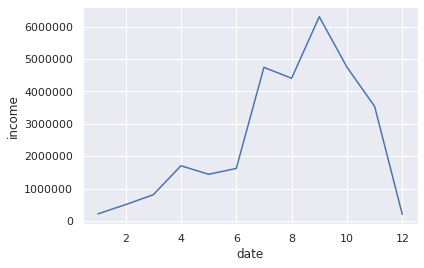

In [490]:
ax = sns.lineplot(x="date", y="income",data=pp_income)

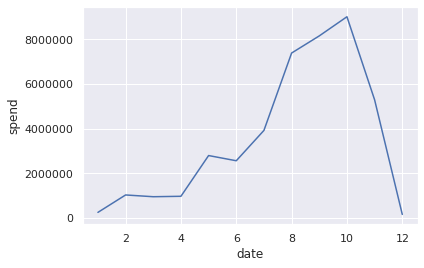

In [491]:
ax = sns.lineplot(x="date", y="spend",data=pp_spend)

In [361]:
pp

,income
date,
1,107407.95
2,142122.15
3,220626.00
4,374751.90
5,173283.57
6,305230.77
7,1321062.25
8,1131766.67
9,1365285.99
